<a href="https://colab.research.google.com/github/KrRishabh/ANN_regression/blob/main/ANNreg_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


tensor(2.4714)


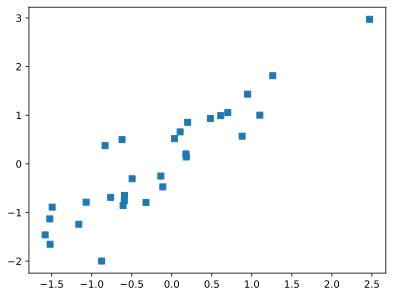

In [8]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2
# print(x)
print(torch.max(x))
plt.plot(x,y,'s')
plt.show()

In [29]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
learningRate = 0.05
lossfun = nn.MSELoss()
numepochs = 500
losses = torch.zeros(numepochs)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [31]:


for epochi in range(numepochs):
  yHat = ANNreg(x)
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor([[ 0.0643],
        [ 0.9151],
        [-1.4119],
        [ 0.8228],
        [-1.0356],
        [-0.4371],
        [ 0.6869],
        [-0.6917],
        [ 1.3348],
        [-0.3374],
        [ 2.2388],
        [-0.1560],
        [ 0.3712],
        [-0.4402],
        [ 1.5038],
        [-1.4765],
        [ 0.3896],
        [ 1.1031],
        [-0.4555],
        [ 1.1752],
        [-1.3850],
        [-0.7365],
        [-0.6186],
        [-1.4155],
        [-0.9401],
        [-0.4695],
        [ 0.3674],
        [ 0.2909],
        [ 0.0387],
        [ 0.2179]], grad_fn=<AddmmBackward0>)


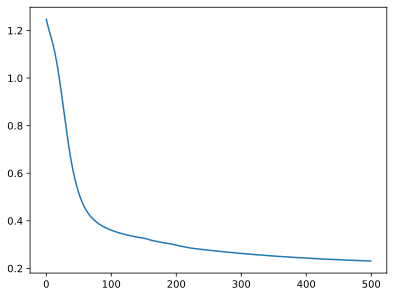

In [34]:
predictions = yHat

plt.plot(losses.detach())
# print(x)
print(predictions)

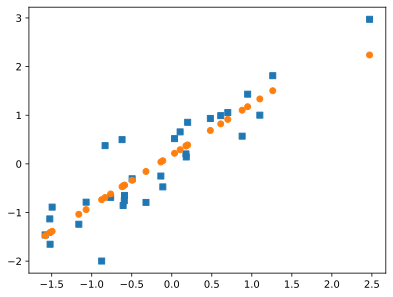

In [36]:
plt.plot(x, y, 's')
plt.plot(x, predictions.detach(), 'o')

## Classify qwerty data

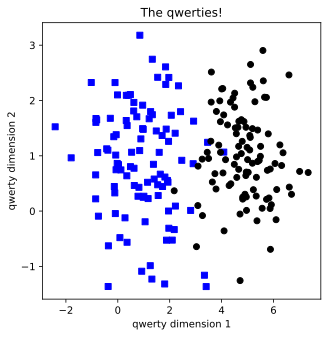

In [37]:
 # create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [38]:

# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [39]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn. ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)


ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [40]:
learningRate = 0.1
lossfun = nn.BCELoss()

optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [41]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in  range(numepochs):
  yHat = ANNclassify(data)

  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

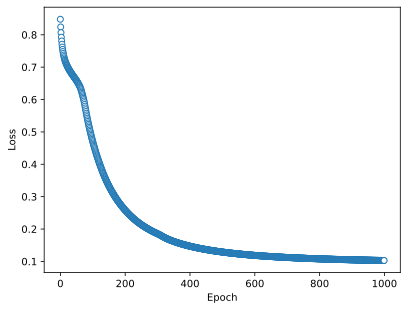

In [42]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [45]:
predictions = ANNclassify(data)
predlabels = predictions > 0.5
# print (predictions)
print(predlabels)

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False